In [ ]:
import pandas as pd
import re

In [ ]:
f=open('/content/WhatsApp Chat with Introduction to Machine learning.txt','r',encoding='utf-8')

In [ ]:
data=f.read()


In [ ]:
print(type(data))

<class 'str'>


In [ ]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [ ]:
messages=re.split(pattern,data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '~\u202f_sierra_alpha_november_ created group "Introduction to Machine learning"\n', "You joined using this group's invite link\n", '+91 98437 94658: Sent ppt for the module 1\nCall me once you are ready with the projector to Open it up\n', "+91 95541 79141 joined using this group's invite link\n", '+91 98437 94658: Ready?\n', '+91 75983 35717: Just a minute mam\n', "Tapas Ranjan MCA PU joined using this group's invite link\n", '+91 75983 35717: Ready mam\n', "+91 63937 37792 joined using this group's invite link\n", '+91 77829 89977: Unit-1 of IML.pptx (file attached)\nUnit-1 of IML.pptx\n', "+91 77829 89977: Today's ppt\n", "+91 99463 71099 joined using this group's invite link\n", '+91 88252 66676: Do we have class today?\n', '+91 75983 35717: There is no ML class today... As of timetable\n', "+91 73526 74281: In our time table it's there.

In [ ]:
dates=re.findall(pattern,data)
dates

['5/10/23, 14:32 - ',
 '5/9/23, 15:23 - ',
 '5/10/23, 14:32 - ',
 '5/10/23, 14:36 - ',
 '5/10/23, 14:39 - ',
 '5/10/23, 14:45 - ',
 '5/10/23, 14:46 - ',
 '5/10/23, 14:46 - ',
 '5/10/23, 14:46 - ',
 '5/10/23, 14:47 - ',
 '5/10/23, 21:08 - ',
 '5/10/23, 21:08 - ',
 '5/11/23, 13:48 - ',
 '5/15/23, 13:37 - ',
 '5/15/23, 13:38 - ',
 '5/15/23, 13:41 - ',
 '5/15/23, 13:42 - ',
 '5/15/23, 13:43 - ',
 '5/15/23, 13:50 - ',
 '5/15/23, 13:51 - ',
 '5/15/23, 13:51 - ',
 '5/15/23, 13:53 - ',
 '5/15/23, 13:54 - ',
 '5/15/23, 14:00 - ',
 '5/15/23, 14:03 - ',
 '5/15/23, 14:11 - ',
 '5/15/23, 14:37 - ',
 '5/15/23, 14:37 - ',
 '5/15/23, 14:37 - ',
 '5/15/23, 14:37 - ',
 '5/15/23, 14:38 - ',
 '5/15/23, 14:38 - ',
 '5/15/23, 14:39 - ',
 '5/16/23, 13:01 - ',
 '5/16/23, 13:01 - ',
 '5/16/23, 16:25 - ',
 '5/17/23, 11:15 - ',
 '5/17/23, 11:53 - ',
 '5/17/23, 12:29 - ',
 '5/17/23, 12:30 - ',
 '5/17/23, 12:31 - ',
 '5/17/23, 12:36 - ',
 '5/17/23, 12:58 - ',
 '5/17/23, 13:03 - ',
 '5/17/23, 13:34 - ',
 '5/17/23, 

In [ ]:
import pandas as pd
from datetime import datetime

# Example DataFrame with messages and dates
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Remove the trailing " - " from 'message_date' and convert to datetime
df['message_date'] = pd.to_datetime(df['message_date'], format="%m/%d/%y, %H:%M - ")

# Rename 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the first few rows of the DataFrame
df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-05-10 14:32:00
1,"~ _sierra_alpha_november_ created group ""Intro...",2023-05-09 15:23:00
2,You joined using this group's invite link\n,2023-05-10 14:32:00
3,+91 98437 94658: Sent ppt for the module 1\nCa...,2023-05-10 14:36:00
4,+91 95541 79141 joined using this group's invi...,2023-05-10 14:39:00


In [ ]:













df.shape

(481, 2)

In [ ]:
user=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\w]+?):\s',message)
    if entry[1:]:
        user.append(entry[1])
        messages.append(entry[2])
    else:
        user.append('group_notification')
        messages.append(entry[0])
df['users']=user
df['message']=messages
df.drop(columns=['user_message'] ,inplace=True)
df.head()

,date,users,message
0,2023-05-10 14:32:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-05-09 15:23:00,group_notification,"~ _sierra_alpha_november_ created group ""Intro..."
2,2023-05-10 14:32:00,group_notification,You joined using this group's invite link\n
3,2023-05-10 14:36:00,94658,Sent ppt for the module 1\nCall me once you ar...
4,2023-05-10 14:39:00,group_notification,+91 95541 79141 joined using this group's invi...


In [ ]:
 df['year']=df['date'].dt.year

In [ ]:
df['month']=df['date'].dt.month_name()

In [ ]:
print(df.dtypes)

date       datetime64[ns]
users              object
message            object
year                int32
month              object
dtype: object


In [ ]:



df['hour']=df['date'].dt.hour

In [ ]:
df['minute']=df['date'].dt.minute


In [ ]:
df['day']=df['date'].dt.day

In [ ]:
df['message'].sample(10)

,message
325,Actually from maths department we have exam fr...
365,Then i will confirm 10th with mam!...\n
70,Thank you ma'am\n
178,No\n
350,😂\n
380,Do we have class today???\n
133,What?\n
159,Confirm it\n
138,half of the students are attending\n
241,Ok\n


In [ ]:
 user_list=df['users'].unique().tolist()

In [ ]:

words=[]
for message in df['message']:
    words.extend(message.split())

In [ ]:

len(words)

2996

In [ ]:
 !pip install urlextract
 from urlextract import URLExtract
 extractor=URLExtract()
 urls=extractor.find_urls('lets have URL stackoverflow.com as an example google.com ,http://facebook.com ')


In [ ]:

 urls


['stackoverflow.com', 'google.com']

In [ ]:
 links=[]
 for message in df["message"]:
     cleaned_message = re.sub(r'[-]+', ' ', message)
     links.extend(extractor.find_urls(cleaned_message))
 links

['I.ML',
 'M.Sc',
 'm.sc',
 'M.sc',
 'M.sc',
 'M.sc',
 'M.Sc',
 'M.Tech',
 'M.Tech',
 '1.2.3.5']

In [ ]:
x=df['users'].value_counts().head()

In [ ]:
 import matplotlib.pyplot as plt

In [ ]:
name=x.index
count=x.values

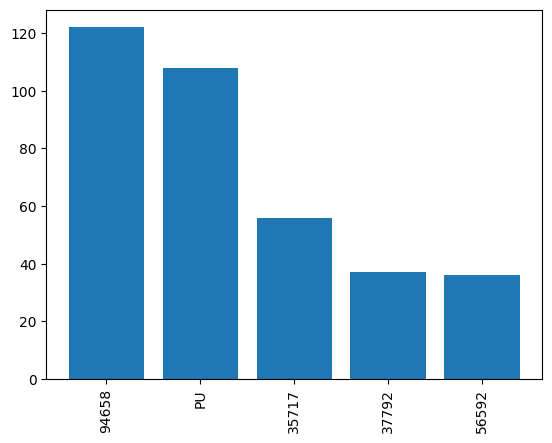

In [ ]:
 plt.bar(name,count)
 plt.xticks(rotation='vertical')
 plt.show()

In [ ]:
 round((df['users'].value_counts()/df.shape[0])*100,2)

,count
users,
94658,25.36
PU,22.45
35717,11.64
37792,7.69
56592,7.48
89551,7.07
group_notification,2.70
74281,2.29
66676,1.46


In [ ]:

 round((df['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'users':'name','count':'percent'})

,name,percent
0,94658,25.36
1,PU,22.45
2,35717,11.64
3,37792,7.69
4,56592,7.48
5,89551,7.07
6,group_notification,2.70
7,74281,2.29
8,66676,1.46
9,PDY,1.46


In [ ]:
 temp=df[df['users']!='group_notification']
 temp=temp[temp['message']!='<Media omitted>\n']
 temp.sample(10)

,date,users,message,year,month,hour,minute,day
103,2023-06-20 13:56:00,PU,Okayt\n,2023,June,13,56,20
413,2023-08-03 12:11:00,PU,No\n,2023,August,12,11,3
135,2023-07-03 16:17:00,35717,Batch 1 of M.Sc is attending mam\n,2023,July,16,17,3
127,2023-07-03 12:05:00,PU,No\n,2023,July,12,5,3
228,2023-07-19 14:00:00,94658,Department will not provide\n,2023,July,14,0,19
260,2023-07-31 19:47:00,Pondy,Yes\n,2023,July,19,47,31
82,2023-06-13 12:51:00,94658,Many yet to come\n,2023,June,12,51,13
240,2023-07-25 14:06:00,PU,Maam it is available..\n,2023,July,14,6,25
153,2023-07-04 13:55:00,02662,Do we have class today?\n,2023,July,13,55,4
111,2023-06-21 14:23:00,94658,Hi all\nNot well today\n\nPostponing the class...,2023,June,14,23,21


In [ ]:
 f=open('/content/stop_hinglish.txt','r')
 stop_words=f.read()
 print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [ ]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
words


['ppt',
 'module',
 'call',
 'projector',
 'open',
 'ready?',
 'minute',
 'mam',
 'mam',
 'unit-1',
 'iml.pptx',
 '(file',
 'attached)',
 'unit-1',
 'iml.pptx',
 "today's",
 'ppt',
 'class',
 'today?',
 'ml',
 'class',
 'today...',
 'timetable',
 'table',
 'there.',
 'msc',
 'timetable',
 'there....',
 'class',
 'today?',
 'message',
 'deleted',
 'img-20230515-wa0004.jpg',
 '(file',
 'attached)',
 "ma'am",
 'class.',
 '<media',
 'omitted>',
 '2:30',
 'iml',
 'tuesday',
 '2.30',
 '3.30',
 'wednesday',
 '2.30',
 '4.30',
 'i.ml.',
 'class',
 '??',
 'macha',
 "ma'am",
 'mentioned',
 'class',
 'timings',
 'macha',
 'today',
 'iml',
 'class',
 'class',
 'compensated',
 'mam',
 'class',
 'today?',
 'class',
 'pm?',
 "ma'am.",
 'classes',
 '1:30.',
 'pm',
 'difficult',
 'lunch',
 'half',
 'hour',
 "ma'am",
 'then...',
 'class',
 '2.30???',
 'today',
 'class',
 'today...?',
 'today',
 'iml',
 'class',
 'mam',
 'class',
 'today.',
 'classes',
 'tomorrow.',
 "ma'am",
 'class',
 'today',
 '2.30?',

In [ ]:
 from collections import Counter
 pd.DataFrame(Counter(words).most_common(20))

,0,1
0,class,63
1,ma'am,46
2,seminar,25
3,mam,21
4,today,21
5,iml,19
6,august,18
7,maam,14
8,today?,12
9,message,12


In [ ]:
 !pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 14.4 MB/s eta 0:00:00


In [ ]:

 import emoji

In [ ]:

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])


In [ ]:

 pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,13
1,🤣,7
2,😊,5
3,🤔,5
4,🥲,4
5,😅,3
6,😕,2
7,💯,2
8,☺,2
9,🥳,2


In [ ]:
 df['month_num']=df['date'].dt.month

In [ ]:
 df

,date,users,message,year,month,hour,minute,day,month_num
0,2023-05-10 14:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,May,14,32,10,5
1,2023-05-09 15:23:00,group_notification,"~ _sierra_alpha_november_ created group ""Intro...",2023,May,15,23,9,5
2,2023-05-10 14:32:00,group_notification,You joined using this group's invite link\n,2023,May,14,32,10,5
3,2023-05-10 14:36:00,94658,Sent ppt for the module 1\nCall me once you ar...,2023,May,14,36,10,5
4,2023-05-10 14:39:00,group_notification,+91 95541 79141 joined using this group's invi...,2023,May,14,39,10,5
...,...,...,...,...,...,...,...,...,...
476,2023-08-28 11:04:00,47369,He left university ma'am\n,2023,August,11,4,28,8
477,2023-08-28 11:44:00,94658,Oh\n,2023,August,11,44,28,8
478,2023-08-29 11:25:00,94658,IMG-20230829-WA0001.jpg (file attached)\n,2023,August,11,25,29,8
479,2023-08-29 12:13:00,21204,🥳🥳🔥\n,2023,August,12,13,29,8


In [ ]:
 timeline=df.groupby(['year','month']).count()['message'].reset_index()

In [ ]:
 timeline

,year,month,message
0,2023,August,101
1,2023,July,253
2,2023,June,53
3,2023,May,73
4,2024,September,1


In [ ]:
 time=[]
 for i in range(timeline.shape[0]):
     time.append(timeline['month'][i]+" "+str(timeline['year'][i]))

In [ ]:
timeline['time']=time

In [ ]:
 timeline

,year,month,message,time
0,2023,August,101,August 2023
1,2023,July,253,July 2023
2,2023,June,53,June 2023
3,2023,May,73,May 2023
4,2024,September,1,September 2024


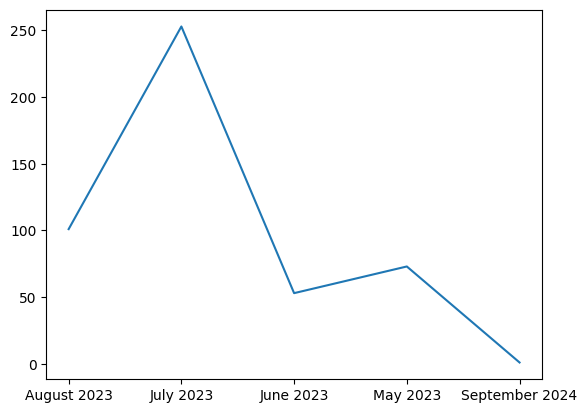

In [ ]:
 plt.plot(timeline['time'],timeline['message'])

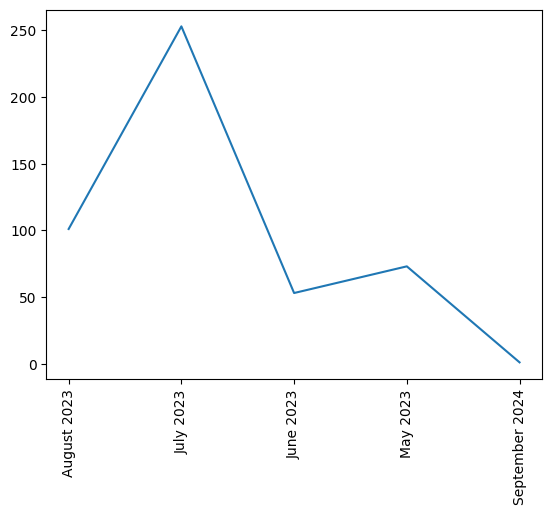

In [ ]:
 plt.plot(timeline['time'],timeline['message'])
 plt.xticks(rotation='vertical')
 plt.show()

In [ ]:
 df['only_date']=df['date'].dt.date

In [ ]:
  daily_timeline=df.groupby('only_date').count()['message'].reset_index()

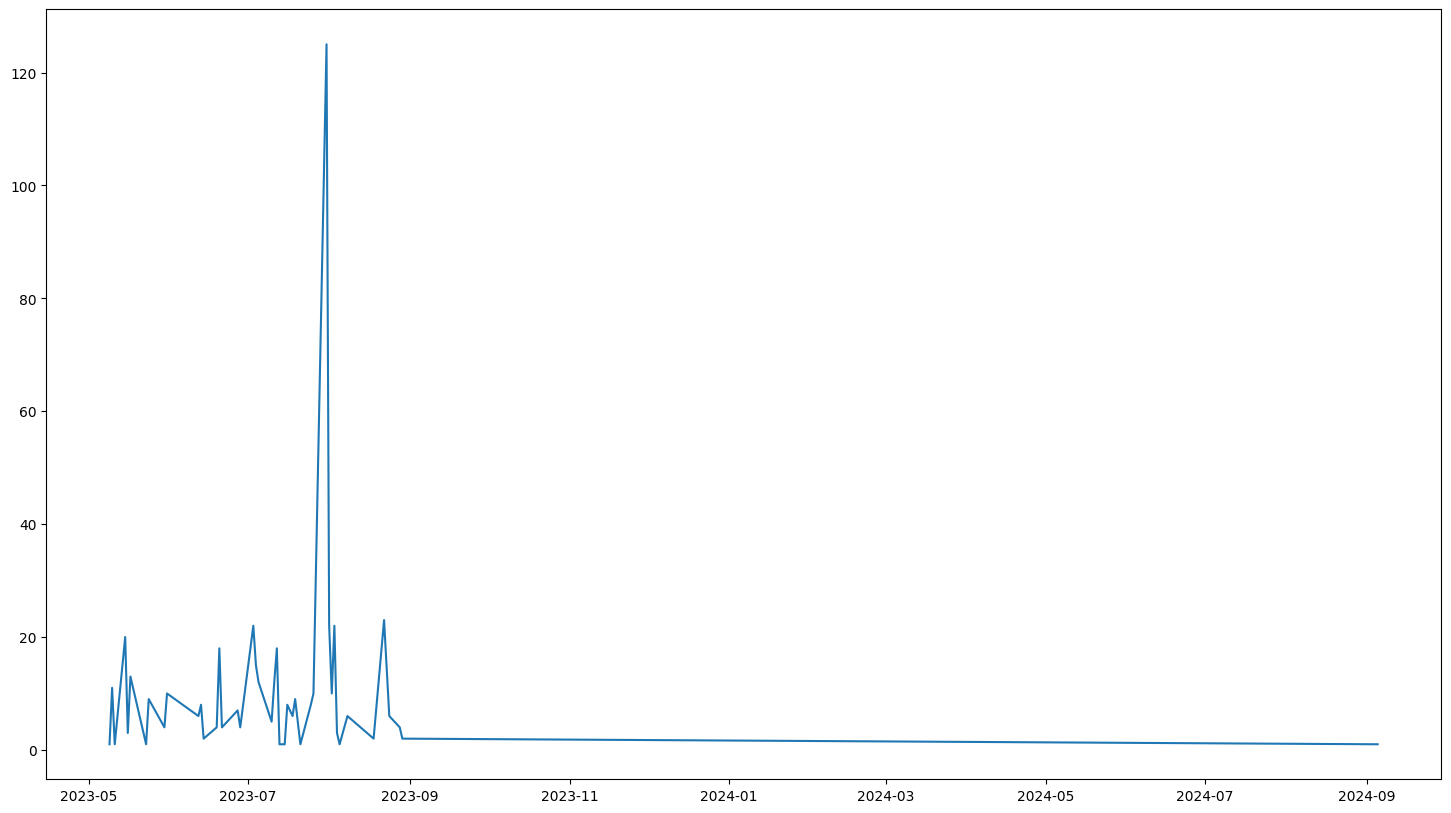

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])


In [ ]:
 df['date'].dt.day_name()

,date
0,Wednesday
1,Tuesday
2,Wednesday
3,Wednesday
4,Wednesday
...,...
476,Monday
477,Monday
478,Tuesday
479,Tuesday


In [ ]:
 df['day_name']=df['date'].dt.day_name()

In [ ]:

df1= df['day_name'].value_counts()

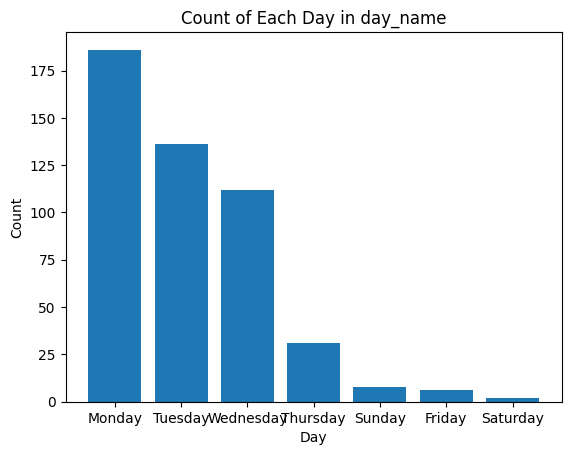

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of each day
df1 = df['day_name'].value_counts()

# Plot as a bar chart
plt.bar(df1.index, df1.values)

# Add labels and title for clarity
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Count of Each Day in day_name")

# Display the plot
plt.show()
